In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from kagglehub import KaggleDatasetAdapter, load_dataset


In [23]:
KAGGLE_JSON_PATH = "kaggle.json"

In [24]:
# Load the Kaggle credentials from a local file
with open(KAGGLE_JSON_PATH, "r") as file:
    kaggle_credentials = json.load(file)

# Set environment variables for Kaggle API access
os.environ["KAGGLE_USERNAME"] = kaggle_credentials["username"]
os.environ["KAGGLE_KEY"] = kaggle_credentials["key"]

print("Kaggle credentials set successfully.")

Kaggle credentials set successfully.


In [25]:
# Importing Essential Libraries 
#import numpy as np # For Numerical Processing
#import pandas as pd # For Data Manipulation
#from matplotlib import pyplot as plt # For Visualisation
#import seaborn as sns # For Statistical Visualisation

In [26]:
#df = load_dataset(
#    KaggleDatasetAdapter.PANDAS,
#    "khushikyad001/covid-19-global-dataset",
#    "full_grouped.csv",
#    pandas_kwargs={"parse_dates": ["Date"]}
#)

#print(df.head())

In [44]:
# Carregar os dados
df = pd.read_csv("synthetic_covid19_data.csv", parse_dates=["date"])


### Insight 1 - Relação entre PIB per capita e número de casos e mortes

In [28]:
# Garantir que a coluna 'date' é datetime
df['date'] = pd.to_datetime(df['date'])

In [35]:
# Agrupar por país e somar total de casos e população
df_pais = df.groupby('location').agg({
    'total_cases': 'max',      # último total registrado
    'total_deaths': 'max',
    'population': 'max',
    'gdp_per_capita': 'max'    # para relacionar depois
}).reset_index()

# Calcular percentual da população infectada e morta
df_pais['percentual_infectados'] = (df_pais['total_cases'] / df_pais['population']) * 100
df_pais['percentual_mortos'] = (df_pais['total_deaths'] / df_pais['population']) * 100


In [36]:
df_pais

location  total_cases  total_deaths  population  gdp_per_capita  \
0   Brazil      9953678        497873  1381572723    69721.587102   
1   Canada      9992154        499012  1390100378    69864.226990   
2   France      9983526        499307  1398452810    69230.428867   
3  Germany      9993726        498782  1384169271    69958.559220   
4    India      9957168        496753  1396314109    69870.025707   
5    Italy      9963441        499208  1391099168    69255.291268   
6    Japan      9991183        499920  1398377115    69919.493397   
7   Russia      9886226        499730  1397318722    69795.619018   
8       UK      9988400        498506  1398727359    69989.049734   
9      USA      9973006        498221  1396678967    69612.006081   

   percentual_infectados  percentual_mortos  
0               0.720460           0.036037  
1               0.718808           0.035898  
2               0.713898           0.035704  
3               0.722002           0.036035  
4               0.713104           0.035576  
5               0.716228           0.035886  
6               0.714484           0.035750  
7               0.707514           0.035763  
8               0.714106           0.035640  
9               0.714051           0.035672

### Insight 2 - Impacto do Lockdown na Redução de Casos de COVID-19

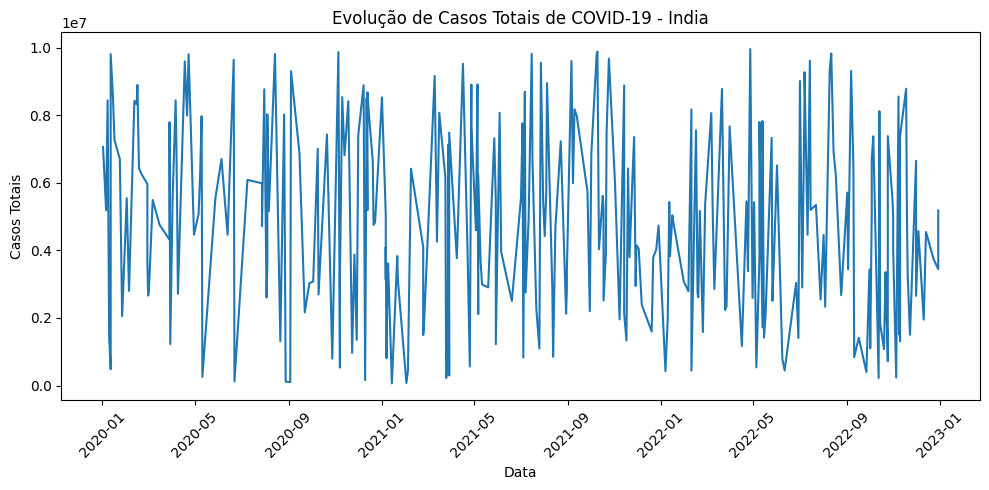

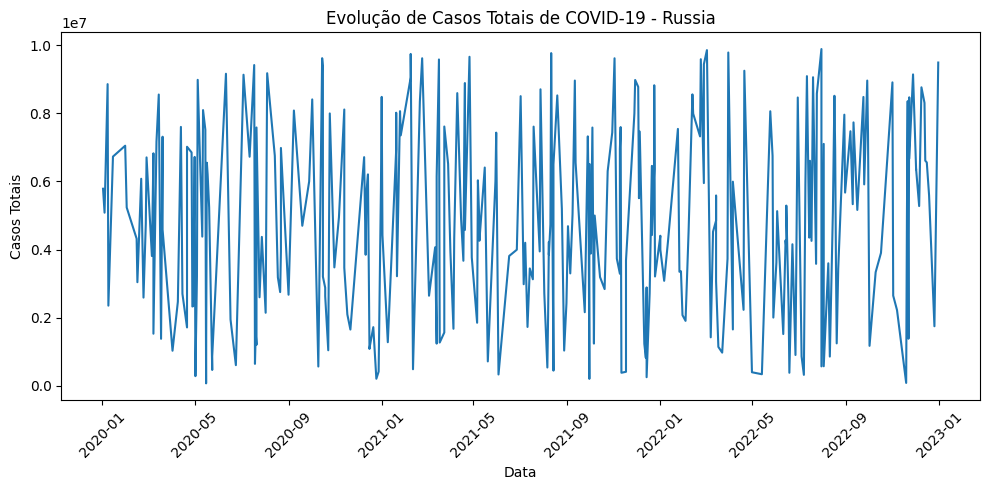

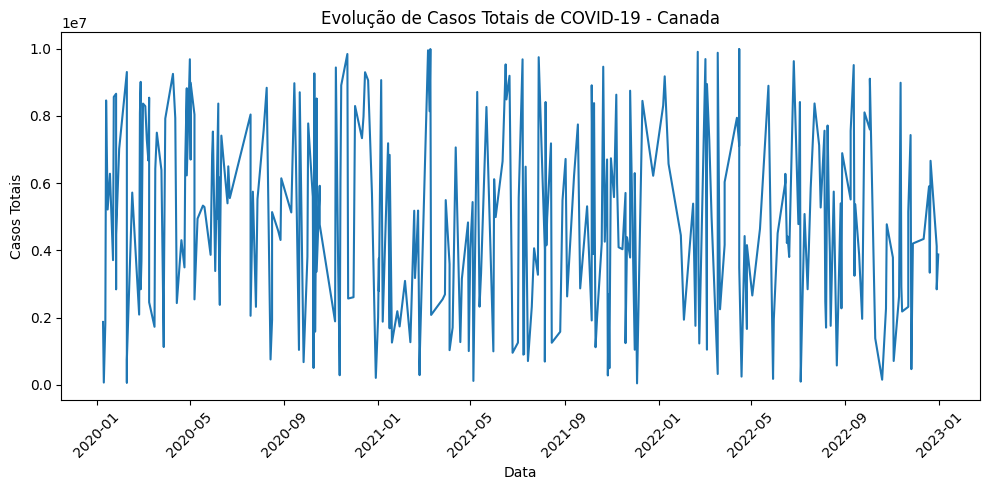

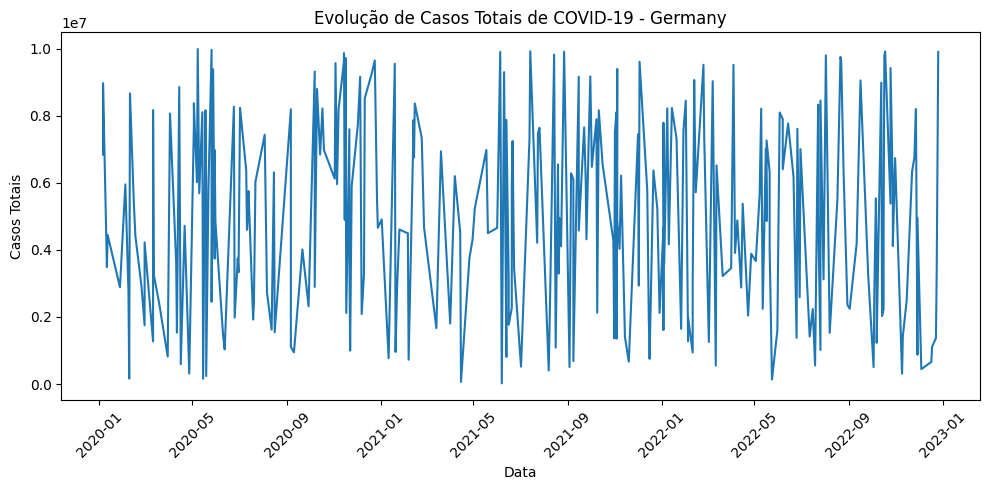

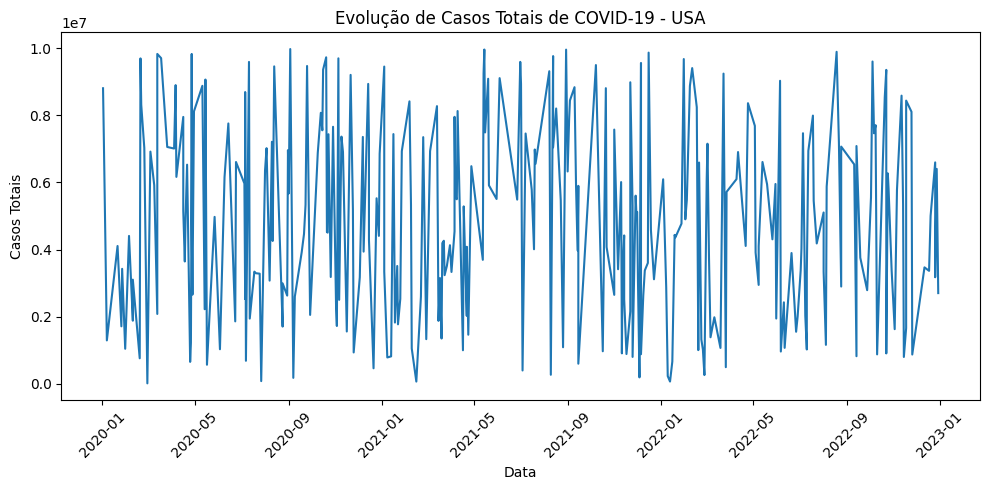

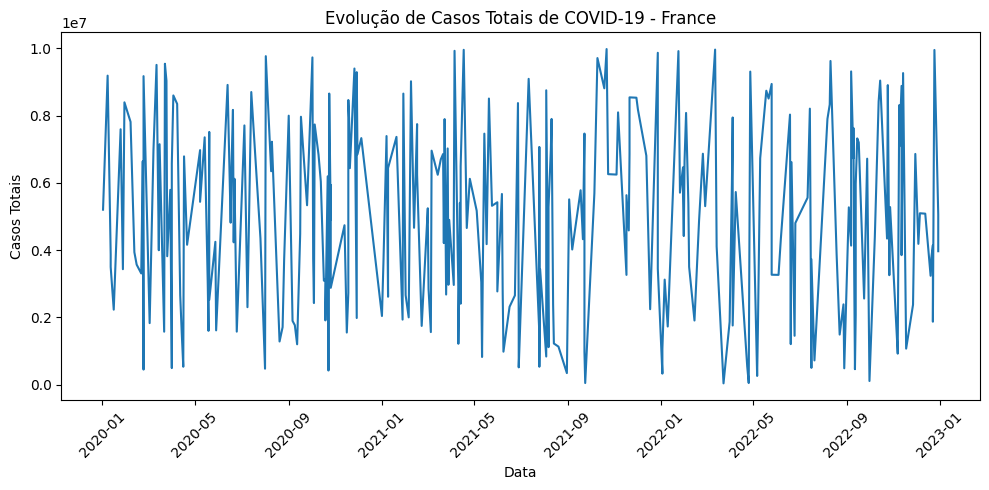

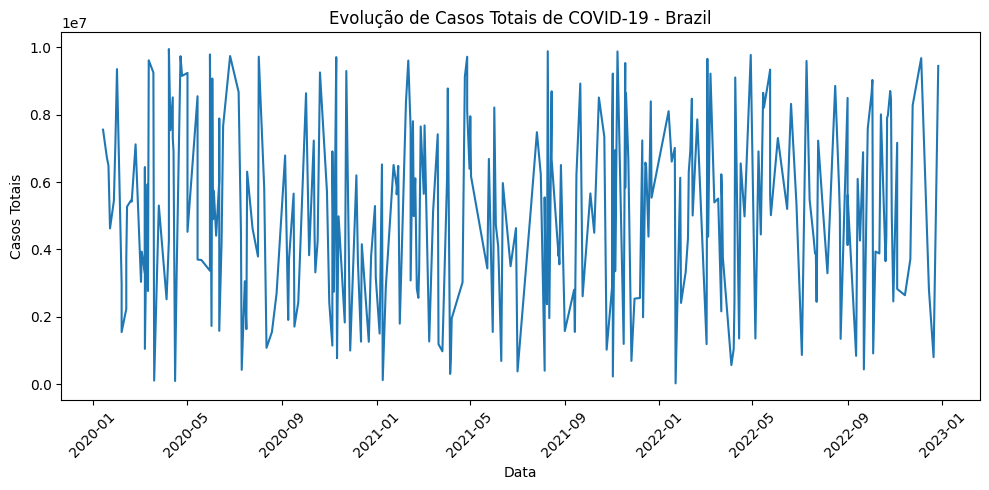

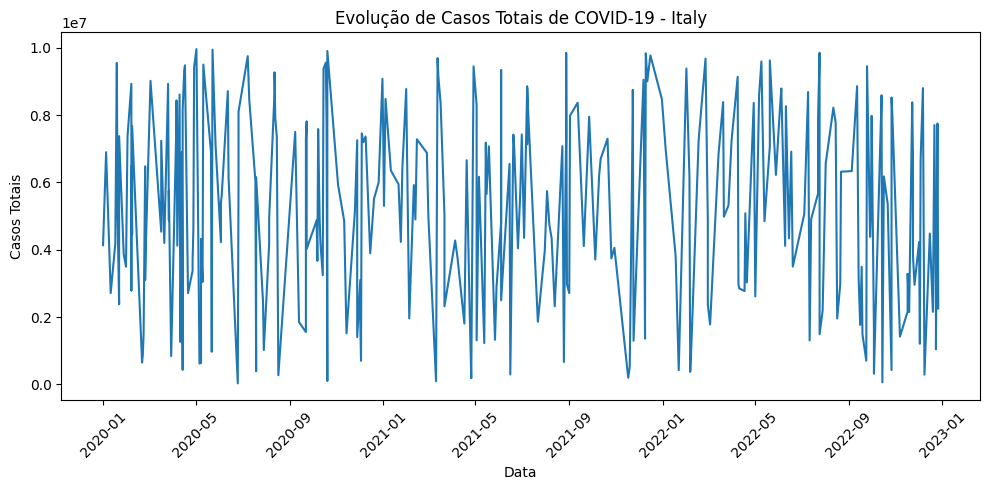

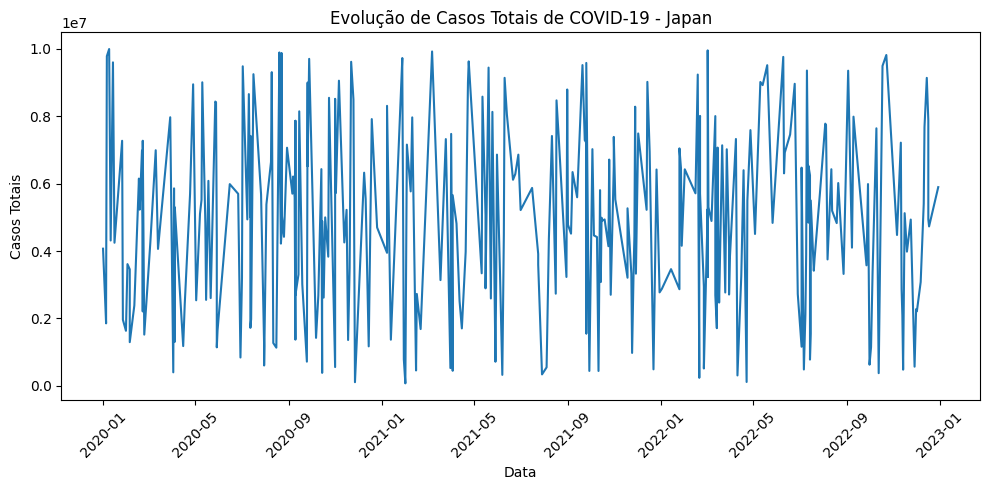

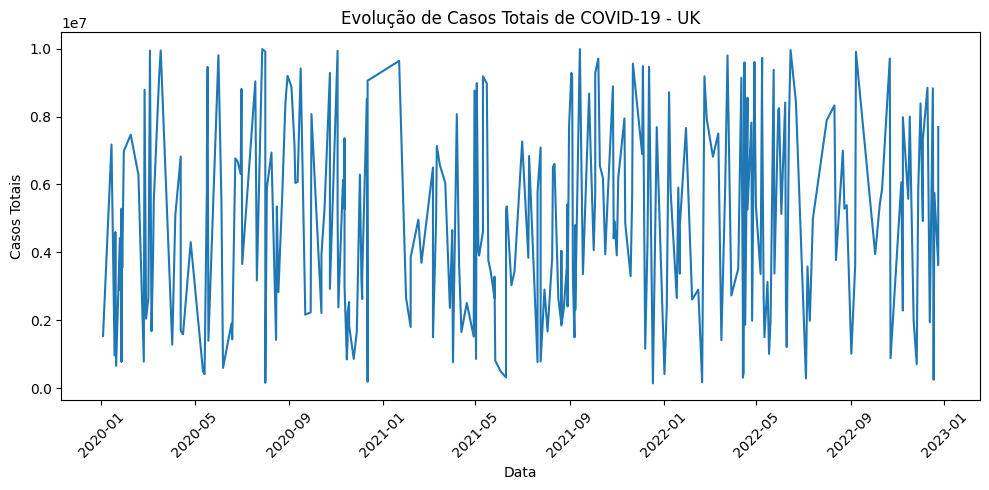

In [ ]:
# Selecionar países únicos
countries = df['location'].unique()

# Criar um gráfico separado para cada país mostrando o crescimento de casos ao longo do tempo
for country in countries:
    country_data = df[df['location'] == country].sort_values('date')
    plt.figure(figsize=(10, 5))
    plt.plot(country_data['date'], country_data['total_cases'])
    plt.title(f"Evolução de Casos Totais de COVID-19 - {country}")
    plt.xlabel("Data")
    plt.ylabel("Casos Totais")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

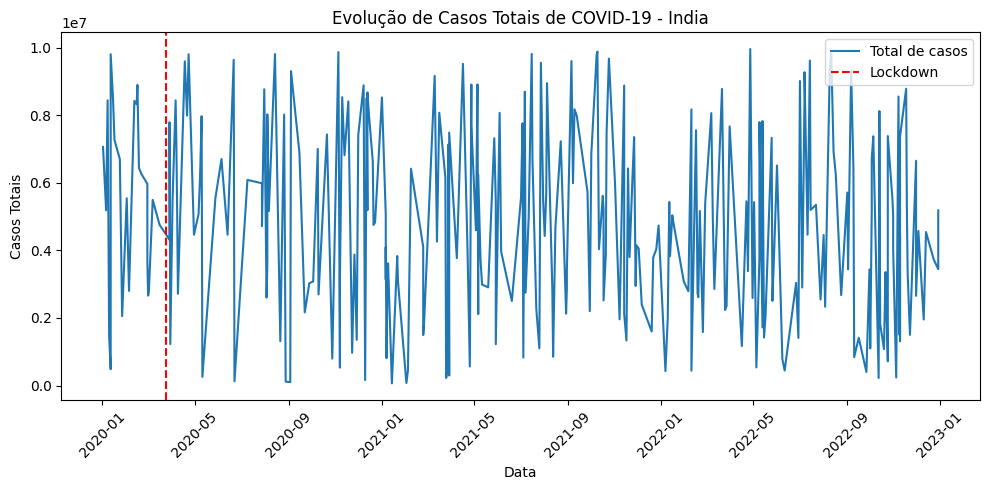

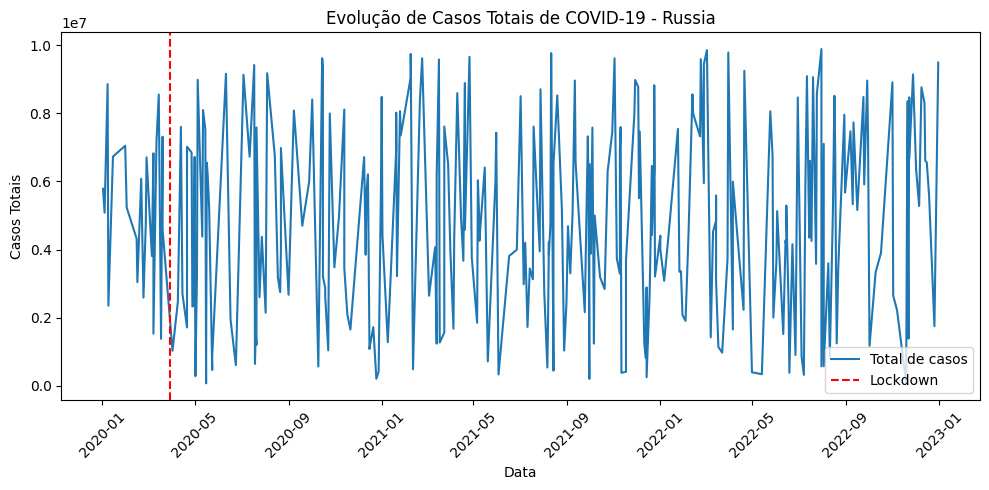

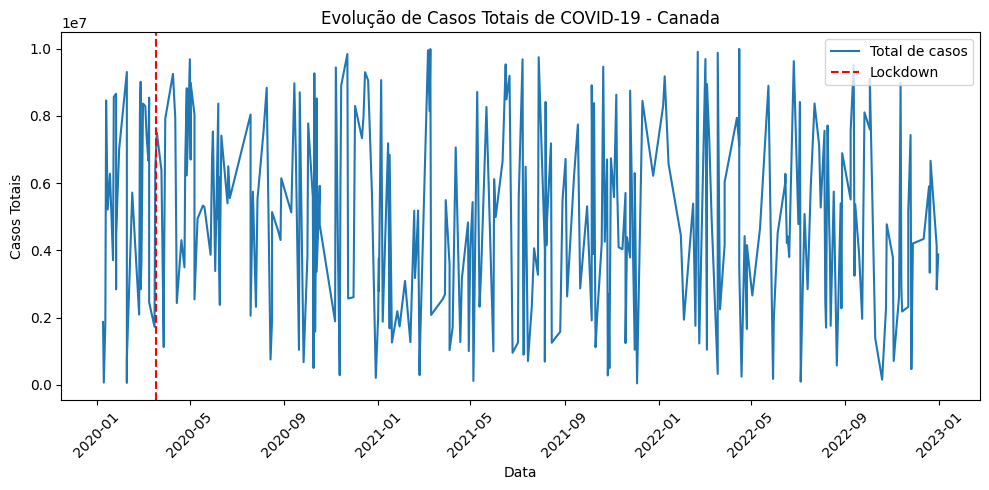

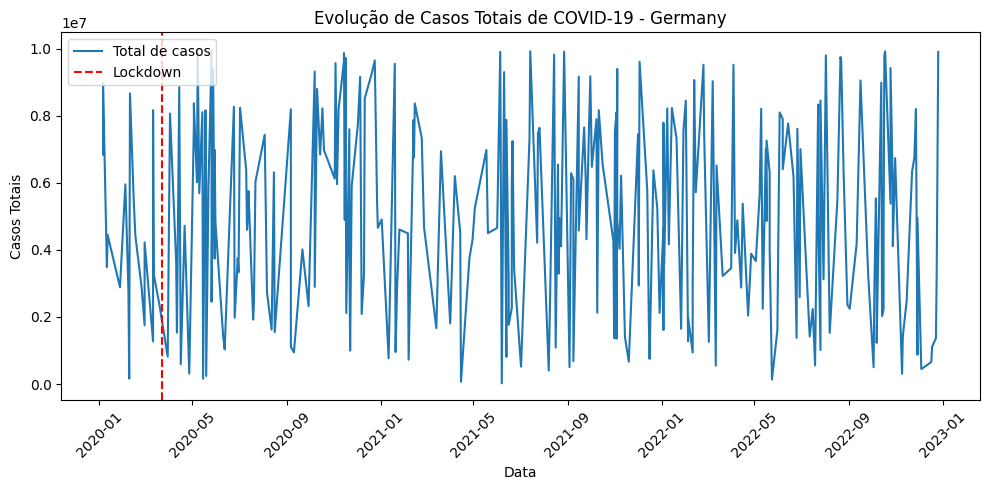

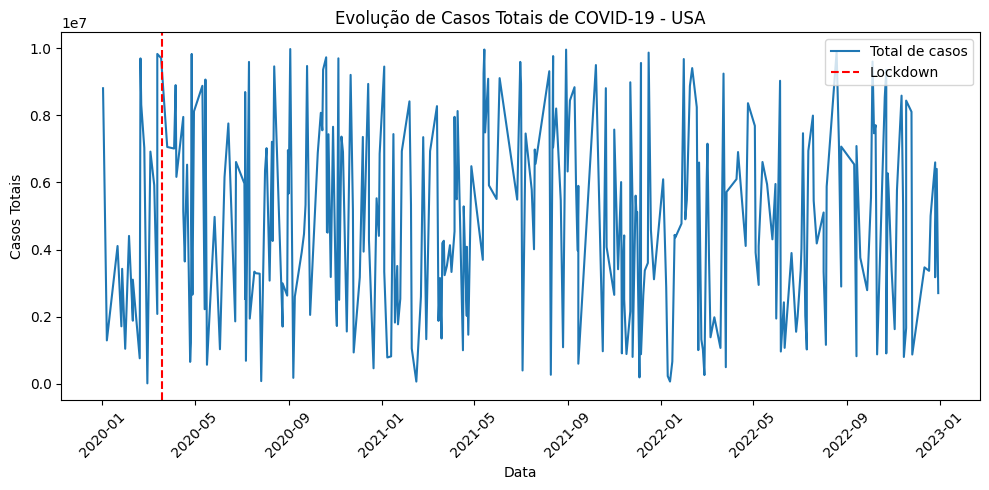

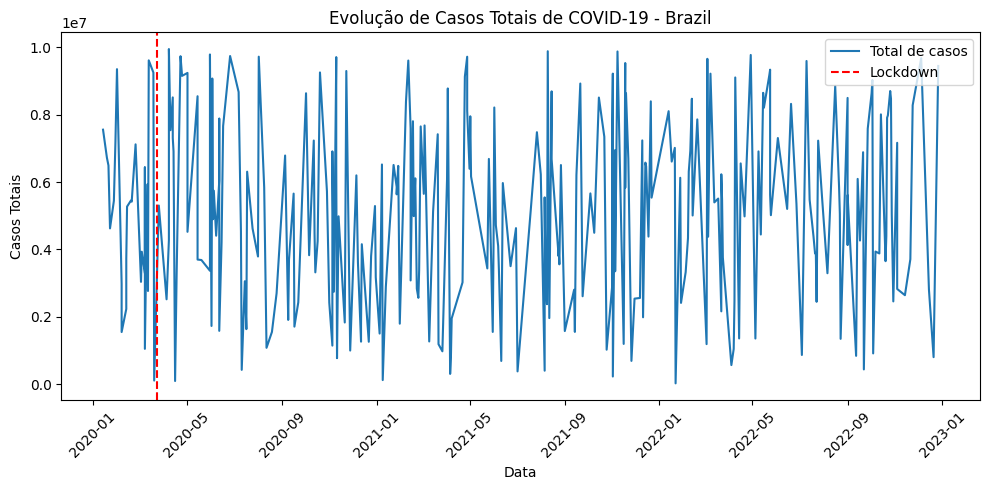

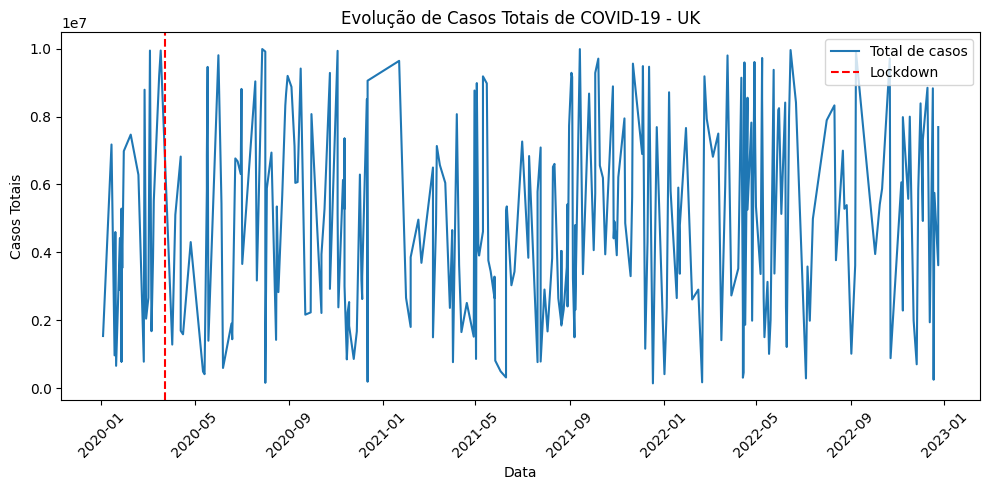

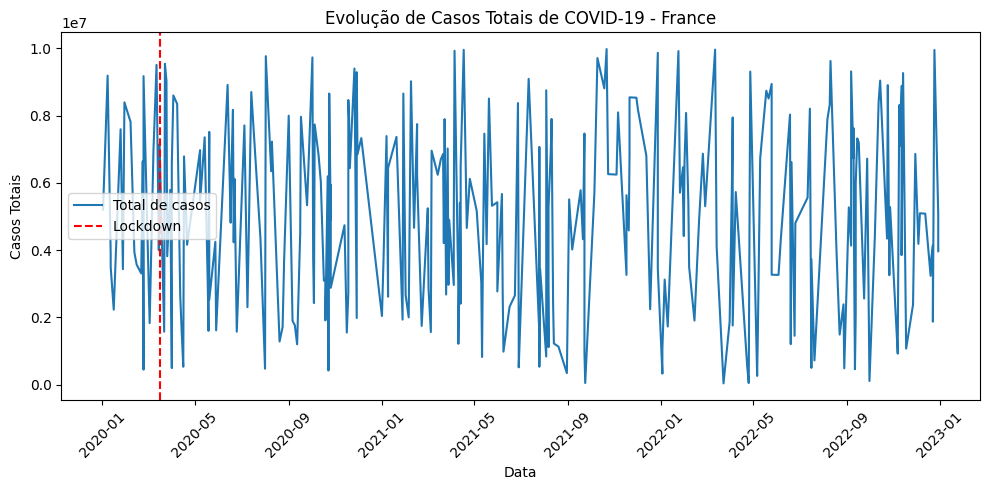

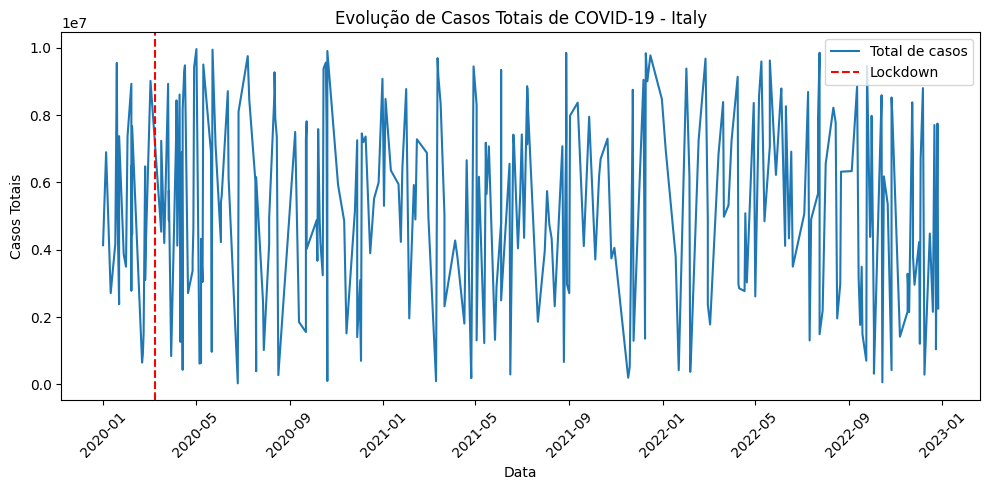

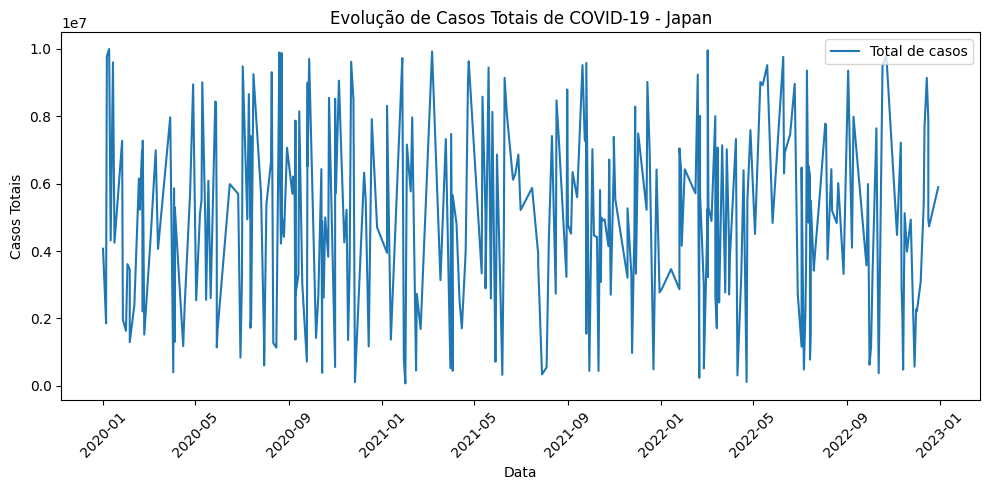

In [47]:
# Dicionário fictício com datas de lockdown para demonstração (em um caso real, essas datas devem ser coletadas de fontes confiáveis)
lockdown_dates = {
    "India": "2020-03-25",
    "Russia": "2020-03-30",
    "Canada": "2020-03-18",
    "Germany": "2020-03-22",
    "USA": "2020-03-19",
    "Brazil": "2020-03-24",
    "UK": "2020-03-23",
    "France": "2020-03-17",
    "Italy": "2020-03-09",
    "Japan": None  # Japão não teve lockdown obrigatório
}

# Refazer os gráficos incluindo linha vermelha na data de lockdown (se houver)
for country in lockdown_dates.keys():
    country_data = df[df['location'] == country].sort_values('date')
    plt.figure(figsize=(10, 5))
    plt.plot(country_data['date'], country_data['total_cases'], label='Total de casos')
    
    lockdown_date = lockdown_dates[country]
    if lockdown_date:
        plt.axvline(pd.to_datetime(lockdown_date), color='red', linestyle='--', label='Lockdown')
    
    plt.title(f"Evolução de Casos Totais de COVID-19 - {country}")
    plt.xlabel("Data")
    plt.ylabel("Casos Totais")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


### Insight - 3 Efeito da vacinação na diminuição de casos

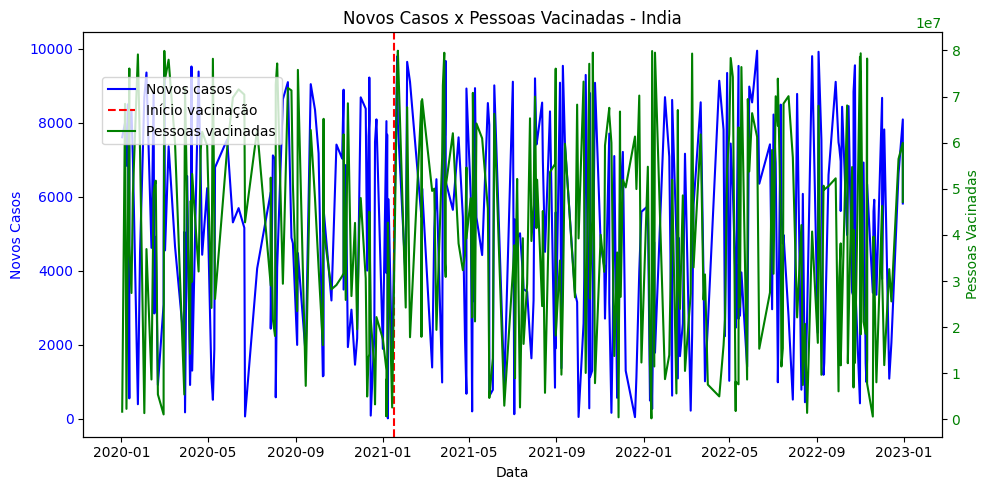

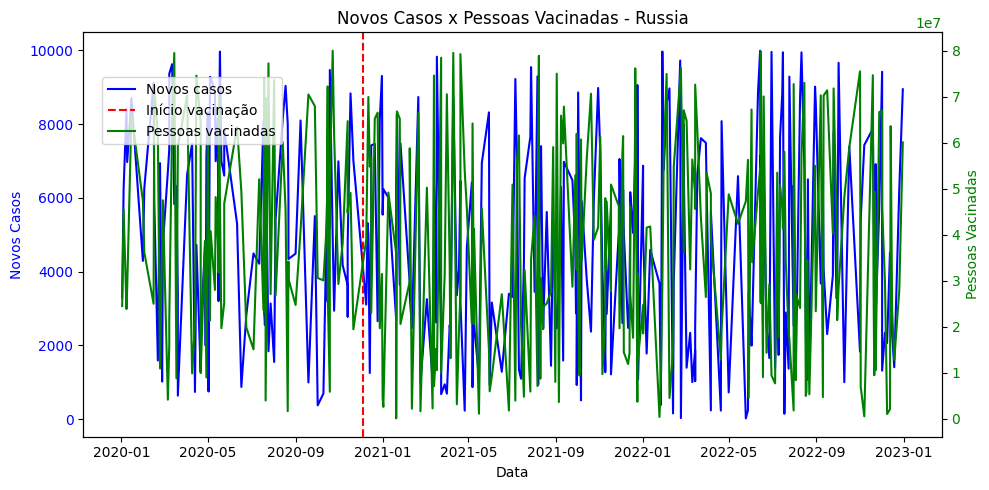

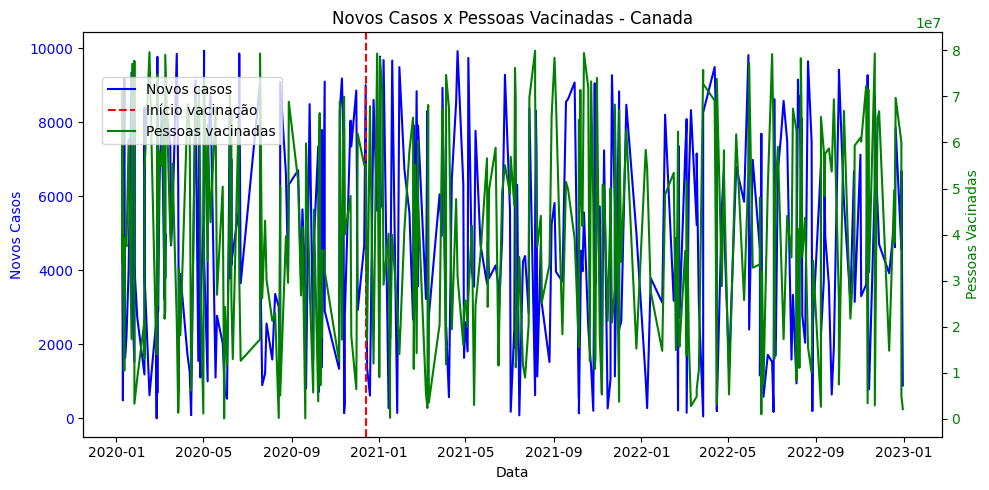

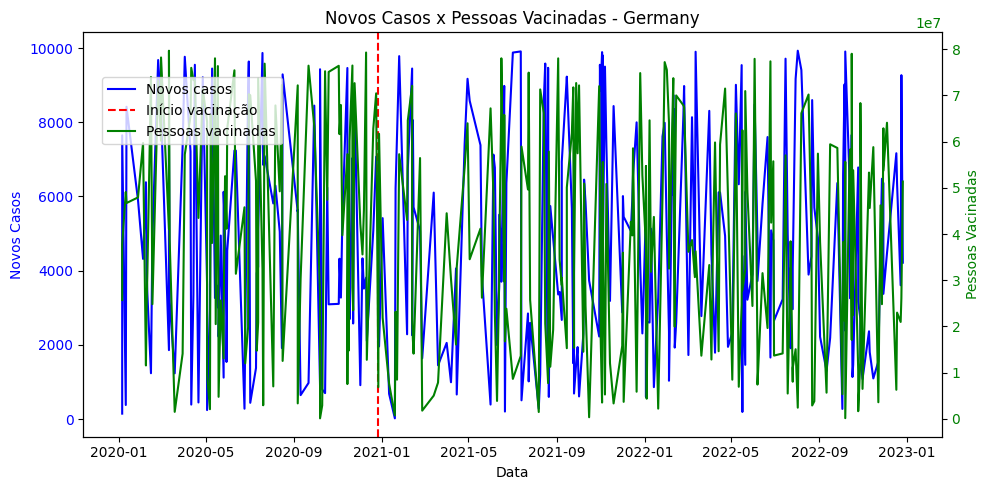

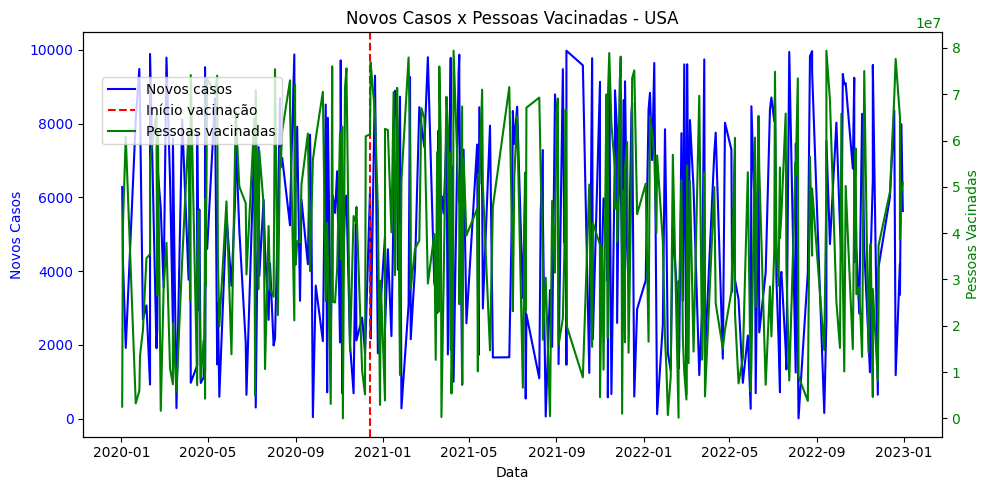

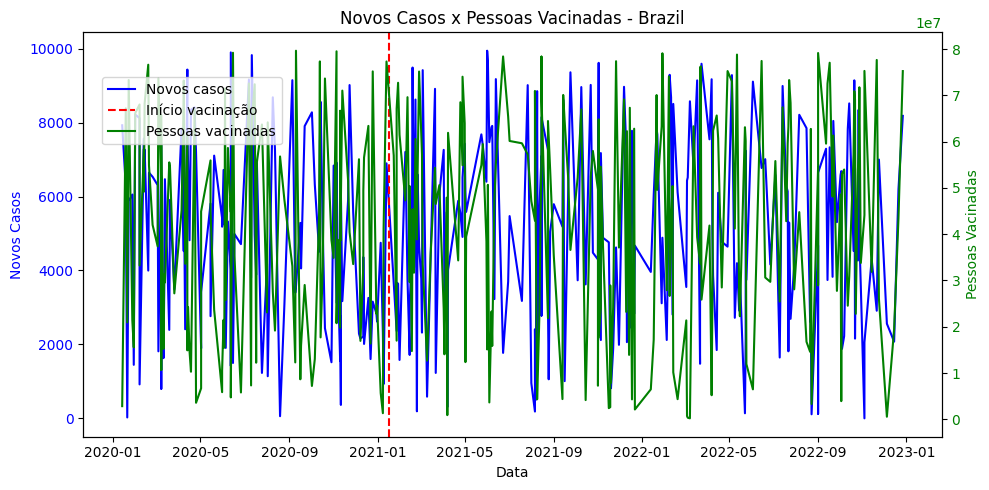

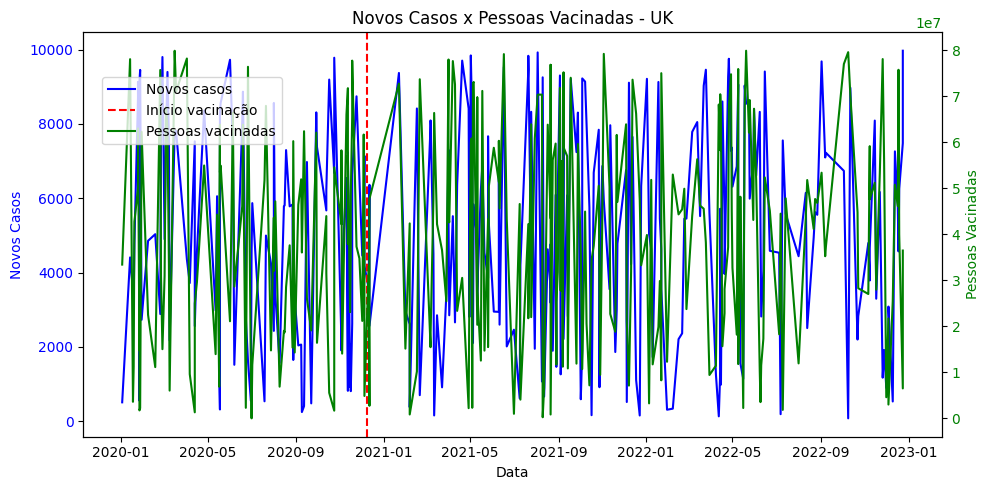

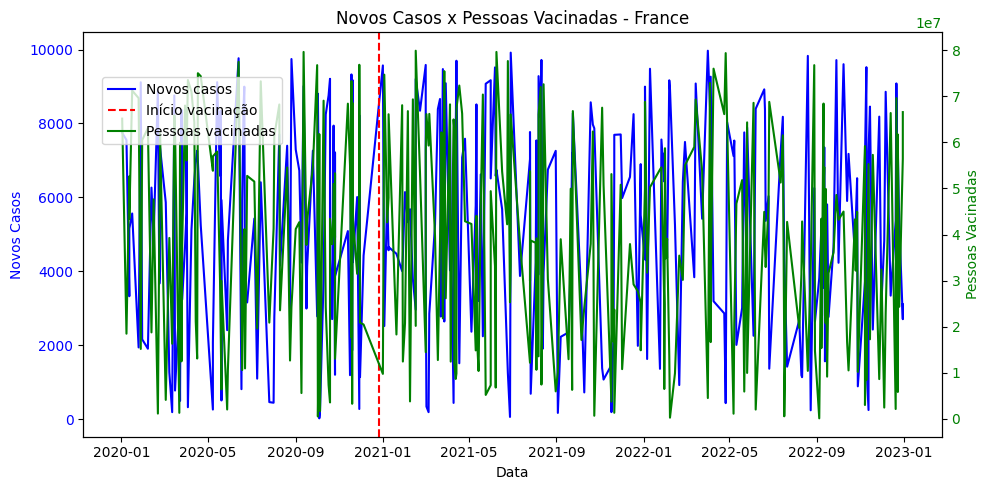

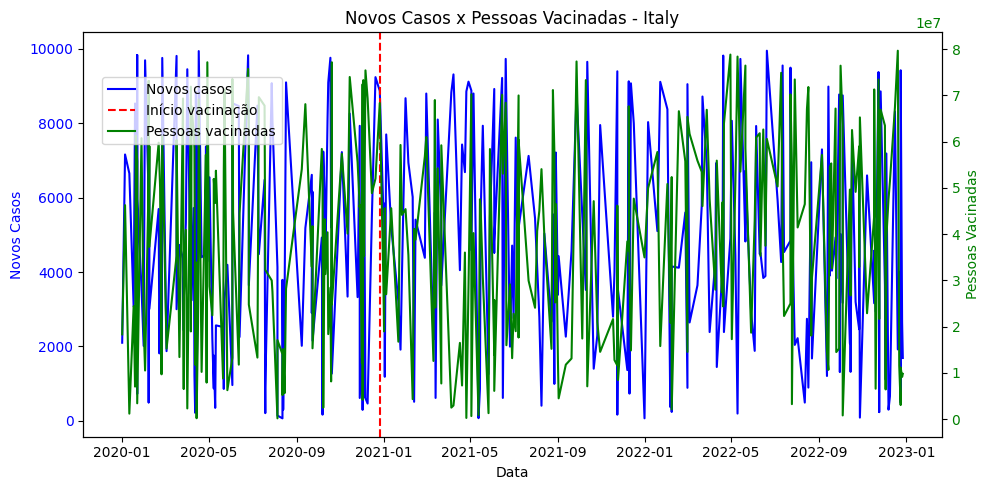

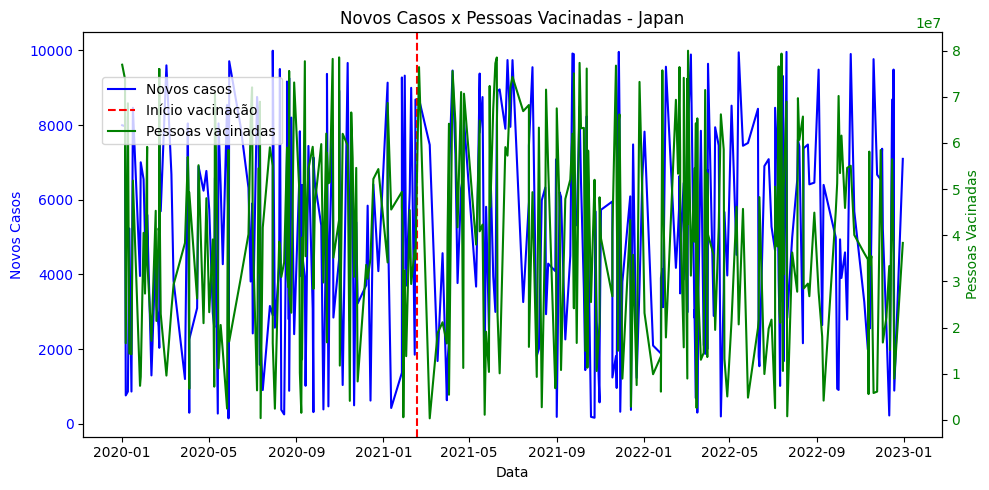

In [48]:
# Dicionário com datas estimadas de início da vacinação por país (com base em dados históricos reais)
vaccination_start_dates = {
    "India": "2021-01-16",
    "Russia": "2020-12-05",
    "Canada": "2020-12-14",
    "Germany": "2020-12-27",
    "USA": "2020-12-14",
    "Brazil": "2021-01-17",
    "UK": "2020-12-08",
    "France": "2020-12-27",
    "Italy": "2020-12-27",
    "Japan": "2021-02-17"
}

# Gráficos mostrando número de novos casos com linha de início da vacinação + gráfico de vacinação
for country in vaccination_start_dates.keys():
    country_data = df[df['location'] == country].sort_values('date')
    
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Eixo primário: novos casos
    ax1.plot(country_data['date'], country_data['new_cases'], label='Novos casos', color='blue')
    ax1.set_xlabel("Data")
    ax1.set_ylabel("Novos Casos", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Adicionar linha de início da vacinação
    vaccination_date = vaccination_start_dates[country]
    if vaccination_date:
        ax1.axvline(pd.to_datetime(vaccination_date), color='red', linestyle='--', label='Início vacinação')

    # Eixo secundário: pessoas vacinadas
    ax2 = ax1.twinx()
    ax2.plot(country_data['date'], country_data['people_vaccinated'], label='Pessoas vacinadas', color='green')
    ax2.set_ylabel("Pessoas Vacinadas", color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    # Título e legendas
    plt.title(f"Novos Casos x Pessoas Vacinadas - {country}")
    fig.tight_layout()
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.85))
    plt.xticks(rotation=45)
    plt.show()


## Insight 3 - Comparação entre continentes ou regiões

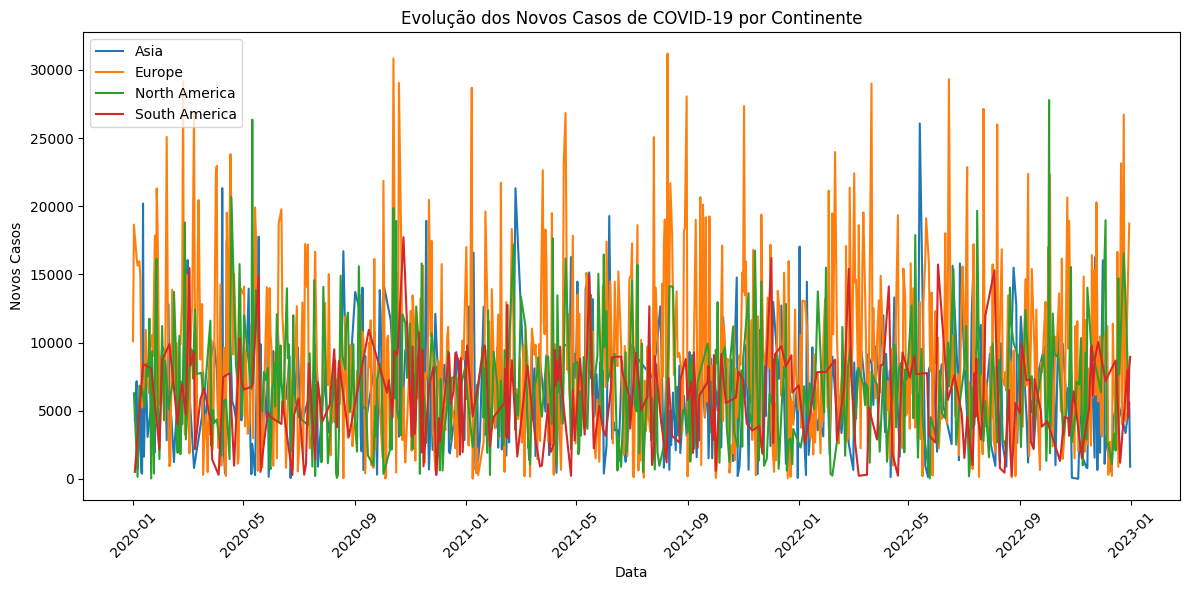

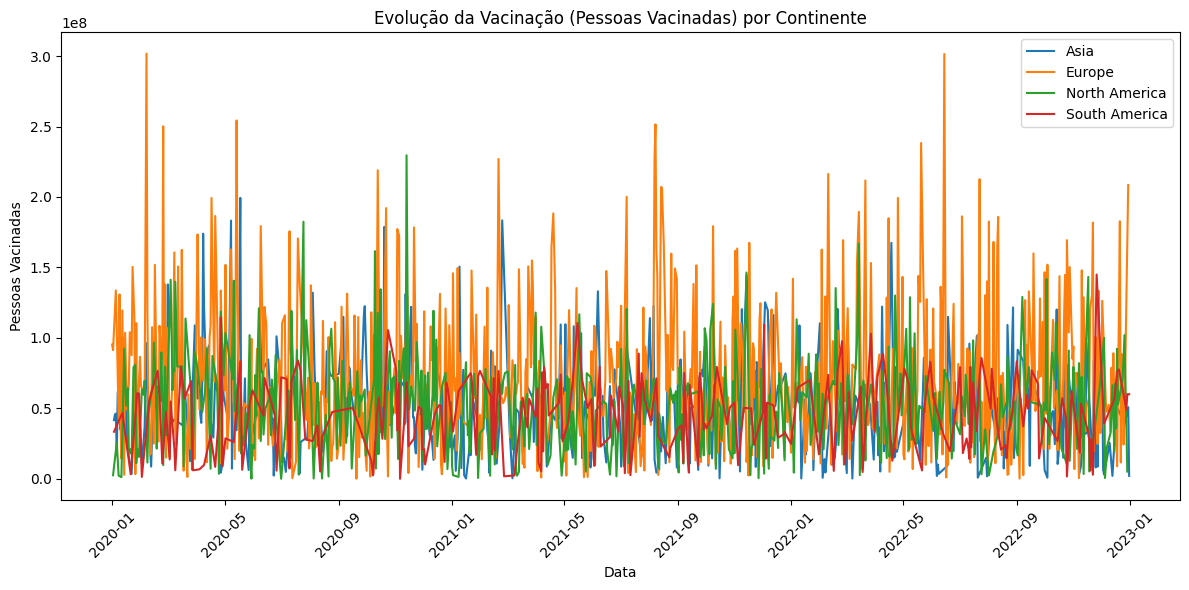

In [49]:
# Agrupar por continente e data para calcular média de novos casos e vacinação
continent_data = df.groupby(['continent', 'date'])[['new_cases', 'people_vaccinated']].sum().reset_index()

# Converter coluna de data
continent_data['date'] = pd.to_datetime(continent_data['date'])

# Filtrar continentes válidos
valid_continents = continent_data['continent'].unique()

# Gráfico comparando novos casos por continente
plt.figure(figsize=(12, 6))
for continent in valid_continents:
    subset = continent_data[continent_data['continent'] == continent]
    plt.plot(subset['date'], subset['new_cases'], label=continent)

plt.title("Evolução dos Novos Casos de COVID-19 por Continente")
plt.xlabel("Data")
plt.ylabel("Novos Casos")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Gráfico comparando pessoas vacinadas por continente
plt.figure(figsize=(12, 6))
for continent in valid_continents:
    subset = continent_data[continent_data['continent'] == continent]
    plt.plot(subset['date'], subset['people_vaccinated'], label=continent)

plt.title("Evolução da Vacinação (Pessoas Vacinadas) por Continente")
plt.xlabel("Data")
plt.ylabel("Pessoas Vacinadas")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


## Insight 5 - 5. Sazonalidade dos casos

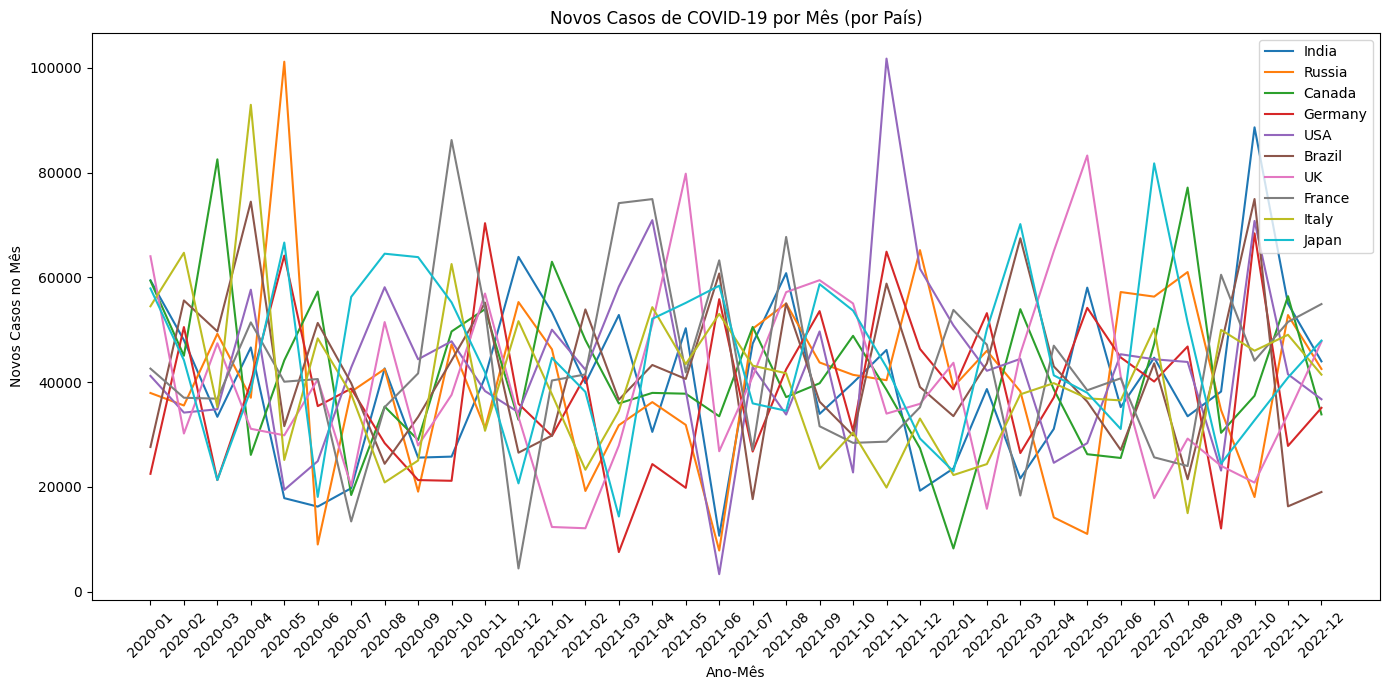

In [50]:
# Criar uma coluna com o mês e ano
df['year_month'] = df['date'].dt.to_period('M').astype(str)

# Lista dos países a incluir no gráfico (os do nosso dicionário anterior)
selected_countries = list(vaccination_start_dates.keys())

# Agrupar por país e mês, somando os novos casos
monthly_cases = df[df['location'].isin(selected_countries)].groupby(['location', 'year_month'])['new_cases'].sum().reset_index()

# Pivotar para formato de gráfico
pivot_df = monthly_cases.pivot(index='year_month', columns='location', values='new_cases')

# Plotar o gráfico
plt.figure(figsize=(14, 7))
for country in selected_countries:
    plt.plot(pivot_df.index, pivot_df[country], label=country)

plt.title("Novos Casos de COVID-19 por Mês (por País)")
plt.xlabel("Ano-Mês")
plt.ylabel("Novos Casos no Mês")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
